In [1]:
import _init_paths
import argparse
import numpy as np
from lib.config import cfg
from lib.common.bboxInfoPredictor import bboxInfoPredictor
from lib.common.keypointPredictor import keypointPredictor
from lib.config import update_config

from lib.common.humanKeypoints import humanKeypoints
from lib.common.visualization import visualization
update_config(cfg)
media_name = ["infant_60.mov", "infant2_60.mp4", "infant3_48.mov", 
"infant4_48.mov", "infant5_48.mov"]

# bbox = bboxInfoPredictor("infant_2.mp4")
# bbox.predict()
# k = keypointPredictor("infant_2.mp4")
# k.predict()
keypoints = humanKeypoints("infant_2.mp4")
v = visualization(keypoints)
v.save_keypoint_video(show_noise=True)

/home/biolab/anaconda3/envs/Wei_env/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0
  3%|▎         | 52/1816 [00:00<00:07, 248.36it/s]

1
1


  7%|▋         | 131/1816 [00:00<00:06, 254.79it/s]

1
1
1
1


 10%|█         | 187/1816 [00:00<00:06, 268.73it/s]

1
1
1


 19%|█▉        | 353/1816 [00:01<00:05, 268.86it/s]

1
1
1


 25%|██▌       | 463/1816 [00:01<00:05, 267.43it/s]

1
1
1
1


 33%|███▎      | 602/1816 [00:02<00:04, 265.54it/s]

1
1
1
1


 39%|███▉      | 714/1816 [00:02<00:04, 272.93it/s]

1
1
1
1
1
1
1
1


 43%|████▎     | 774/1816 [00:02<00:03, 280.64it/s]

1
1
1


 48%|████▊     | 863/1816 [00:03<00:03, 283.70it/s]

1
1
1
1


 54%|█████▍    | 984/1816 [00:03<00:02, 284.53it/s]

1
1
1
1
1
1
1
1
1
1
1
1


 59%|█████▉    | 1070/1816 [00:03<00:02, 274.54it/s]

1
1


 70%|██████▉   | 1263/1816 [00:04<00:02, 263.38it/s]

1
1


 73%|███████▎  | 1319/1816 [00:04<00:01, 268.77it/s]

1


 77%|███████▋  | 1403/1816 [00:05<00:01, 268.45it/s]

1
1
1
1
1
1
1


 81%|████████  | 1466/1816 [00:05<00:01, 285.45it/s]

1
1
1


 86%|████████▌ | 1557/1816 [00:05<00:00, 276.39it/s]

1
1
1
1
1
1
1


 92%|█████████▏| 1674/1816 [00:06<00:00, 285.28it/s]

1
1
1
1
1
1
1
1


 97%|█████████▋| 1762/1816 [00:06<00:00, 280.61it/s]

1
1
1
1


100%|██████████| 1816/1816 [00:06<00:00, 271.34it/s]

1
1
1


In [2]:
# for i in range(len(media_name)):
#     boxes = bboxInfoPredictor(media_name[i], batch_size=8)
#     boxes.predict()

In [3]:
# for i in range(len(media_name)):
#     keypoint_info = keypointPredictor(media_name[i])
#     keypoint_info.predict()

[0.43554871 0.47995762 0.45033722 0.91829062 0.5090286  0.99524797
 0.60246048 1.08453298 0.76162333 1.32075699 0.99203538 1.21135018
 1.17558234 1.31952706 1.44445272 1.45509784 1.58478114]
(17,)


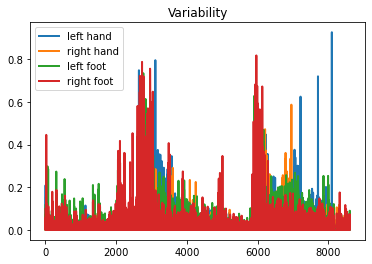

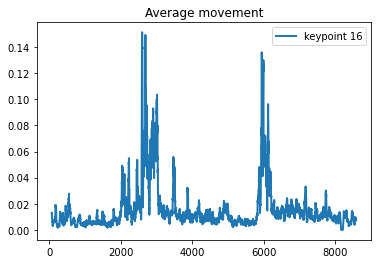

In [4]:
from lib.config import cfg
import os
import pandas as pd
import numpy as np
from lib.common.humanKeypoints import humanKeypoints

KeyPoint = humanKeypoints("infant2_60.mp4")
"infant.mov", "infant2.mp4", "infant3.mov", "infant4.mov", "infant5.mov"
variability = KeyPoint.getKeypointVariability()
mean_variability = np.mean(variability, axis=0)
threshold = mean_variability * 100
print(threshold)

print(np.mean(KeyPoint.getKeypointVariability(), axis= 0).shape)
v = visualization(KeyPoint)
v.draw_variability()
v.draw_average_movement(start_frame=72)
# v.save_keypoint_video()
# v.draw_pose()

In [5]:
from typing import List
import numpy as np

infantKeypoints: List[humanKeypoints] = []
for i in range(len(media_name)):
    infantKeypoints.append(humanKeypoints(media_name[i]))

infants_variability = []
for i in range(len(infantKeypoints)):
    infants_variability.append(np.mean(infantKeypoints[i].getKeypointVariability(), axis=0))

infants_variability = np.array(infants_variability)
infants_variability = np.delete(infants_variability, [1,2,3,4], axis=1)


In [6]:
from lib.utils.featureExtraction import extractFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
import pandas as pd

features = []
df = None
for i in range(len(media_name)):
    infantKeypoint = humanKeypoints(media_name[i])
    df_features = extractFeatures(infantKeypoint)
    if df is None:
        df = df_features
    else:
        df = pd.concat([df, df_features])

df = df.reset_index(drop=True)
features_type_count = df.shape[1]-1
features = df.iloc[:, 0:features_type_count].values
milestones = df["milestone"].values

temp_features = []
for i in range(features.shape[0]):
    temp_features.append(np.concatenate(features[i]))
features = np.asarray(temp_features)

X_new = SelectPercentile(f_classif, percentile=10).fit_transform(features, milestones)
print(X_new.shape)


(5, 8)


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=2)
kmeans.fit(X_new)
print(kmeans.labels_)

names = ["台兒經典案例F+ 53w3d", "F+_20190806＿53w6d", "Normal_20190604_44w6d", "台兒經典案例normal 44W5D",
"台兒經典案例normal 45w6d"]

print("KMeans")
for i in range(len(names)):
    print(names[i], ":", kmeans.labels_[i])

[0 0 0 0 1]
KMeans
台兒經典案例F+ 53w3d : 0
F+_20190806＿53w6d : 0
Normal_20190604_44w6d : 0
台兒經典案例normal 44W5D : 0
台兒經典案例normal 45w6d : 1


In [8]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(X_new)
print(gm)

[1 1 1 1 0]


### K-Means silhouette score

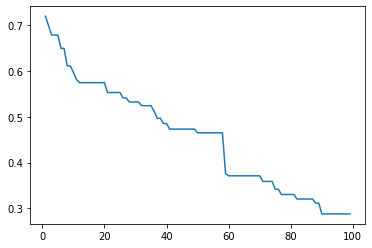

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=2)

scores = []
for i in range(1,100):
    X_new = SelectPercentile(f_classif, percentile=i).fit_transform(features, milestones)
    kmeans.fit(X_new)
    scores.append(silhouette_score(X_new, kmeans.labels_))

x = np.arange(1, 100)
plt.plot(x, scores)